# Phishing URL Detection


From Wikipedia, https://en.wikipedia.org/wiki/Phishing

> Phishing is the fraudulent attempt to obtain sensitive information such as usernames, passwords and credit card details, often for malicious reasons, by disguising as a trustworthy entity in an electronic communication. The word is a neologism created as a homophone of fishing due to the similarity of using a bait in an attempt to catch a victim. The annual worldwide impact of phishing could be as high as US$5 billion.
>
> Phishing is typically carried out by email spoofing or instant messaging, and it often directs users to enter personal information at a fake website, the look and feel of which are identical to the legitimate site, the only difference being the URL of the website in concern. Communications purporting to be from social web sites, auction sites, banks, online payment processors or IT administrators are often used to lure victims. Phishing emails may contain links to websites that distribute malware.
>
> Phishing is an example of social engineering techniques used to deceive users, and it exploits weaknesses in current web security. Attempts to deal with the growing number of reported phishing incidents include legislation, user training, public awareness, and technical security measures.

Here are some examples of the links used in emails sent by the attackers running this phishing campaign:

**Note**: These links may be dangerous to your computer. Our practice will be to "neuter" links by wrapping certain characters with square brackets so that you cannot click on these links, or accidentally copy/paste them into your browser.

**CAUTION: DO NOT CLICK ON OR VISIT THESE LINKS!!**
<pre>
http[:]//team-welcome[.]at[.]ua/facebook-support[.]html
http[:]//reportedpages[.]at[.]ua/facebook-support-account[.]html
http[:]//www[.]facebooks[.]cloud/PayPlls[.]CEanada[.]tNZnZZlR3ZdyZZ-5RkZZDRTZZBy
http[:]//www[.]greenaura[.]net/appz[.]westpac/westpac[.]appz/login[.]php
http[:]//www[.]irastrum[.]com/wp-admin/mail[.]yahoo[.]com/
http[:]//appleid[.]apple[.]com-subscriptions[.]manager508158125[.]kevinfoley[.]com
</pre>
**CAUTION: DO NOT CLICK ON OR VISIT THESE LINKS!!**


Something smells a little phishy about these links. Given a close look by a human, you'd probably be able to decide pretty quickly if the link was really sent by Facebook or not. But billions of people get hundreds or thousands of emails each every day! How can defenders keep up with the onslaught by the phishers?

## The Problem

We want to use methods from Machine Learning to build a computer program that will automatically flag links it thinks are phishing attempts. We can do this by studying the problem, looking at data, and learning a decision rule.

Analyze the data, build a model, and report your findings.

What else do you think you should do about the problem?

## Characteristics of Phishing Domains

Each web page has an address called a Uniform Resource Locator (URLs). A typical URL can be broken down into parts.
https://miro.medium.com/max/1400/1*mPoNQ5LUkuOTog1dUb1EFw.png



## Features Used for Phishing Domain Detection

Malicious phishing URLs and their web pages often have several tell tale features which can be used to tell them apart from benign legitimate URLs. For example, an attacker can register long and confusing domain to hide the actual domain name, maybe including subtle typos in the names of the target (ex. Faceboook[.]com) In some cases attackers can use direct IP addresses instead of using the domain name.

Our hypothesis is that if we can come up with enough distinguishing features of URLs we can teach our computer program to tell phishing URLs apart from legitimate URLs. For a phishing campaign there are four common places to study for these features:

1. URLs
2. Domain information
3. Message and Webpage content

Let's take a look at some examples of the first two:

#### URL-Based Features

URLs of phishing domains often have distinctive features. Some things that stand out from reviewing phishing URLs are:

* \# of Digits in the URL. Phishing URLs often have lots of numbers in them compared to legitimate URLs.
* Length of the URL. Phishing URLs are often longer and more complicated than legitimate URLs.
* Number of subdomains in URL. Phishing URLs often attempt to obscure the real domain the user is being sent to by using lots of subdomains (ex. icloud.apple.com-thisisactuallythedomainoverhere[.]tk)
* Is Top Level Domain (TLD) one of the commonly used one like .com or .org, or is it one that is run by a company that doesn't do a lot of checking on what its customers are up to (*cough* .ru *cough*)?
* Checking whether it includes a legitimate brand name or not (apple-icloud-login[.]com)
* Checking whether the URL is Typosquatted or not. (ex. google.com vs goggle[.]com)

URL based features are a great place to start. But there's more information available you could leverage.


#### Domain-Based Features

An attacker has to use a domain name to host his webpage. What sort of things can that domain name tell us?

* Does the IP address associated with this domain appear on security blacklists? Often attackers will reuse their computer infrastructure to carry out different attacks (cheap? lazy? both?). Did we already catch them under an old name?
* How long ago was the domain registered (created)? Newly created domain names aren't usually associated with big brands like your bank or Facebook, so why is a brand new piece of the web asking for my social security number?
* Is the registrant's name hidden in the WHOIS (directory) information? Legitimate businesses aren't usually interested in obscuring the address of their IT dept. from the Internet's white pages.
* Rank on the Majestic Million Sites list. Security researchers use lists like these to see if a site is broadly popular. Sites that are visited by lots of people tend to be legit, while phony sites tend to be visited by the small number of victims that are tricked into visiting them.


These are just some ideas that people have found useful for identifying Phishing attacks. They're not foolproof, and attackers are evolving all the time as we get better at stopping them. 

## Explore Some Data

Let's take a look at some of these features on a set of URLs from PhishTank and DMOZ.

* Benign or Malicious (Label)
* URL
* Length of URL
* Number of dots in URL
* Security sensitive words in URL?
* IP address present in URL?
* Domain creation (months)
* Domain expiration (months)
* Domain update (days)
* Domain length
* Number of hyphens in domain
* Directory portion length
* Length of file

In [3]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

#Feel free to import other libraries that you're interested in using
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [4]:
###Opening Training Training Dataset file to read values
df = pd.read_csv('URL_Data.csv')
#### Printing the information of the Dataframe

df.head()

,len of url,no of dots,security sensitive words,no of hyphens in dom,dir_len,no of subdir,domain len,domain token count,path token count,ip present,...,len_of_argument,no_of_variables,len_of_largest_variable_val,max_no_of_argum_delims,create_age(months),expiry_age(months),update_age(days),zipcode,URL,Label
0,66,5,0,0,33,4,13,2,4,0,...,9,1,4,0,45,3,260,187553,http://taylortea.com/wp-content/plugins/akisme...,1
1,56,9,1,0,17,3,26,6,3,0,...,0,0,0,0,226,14,8,85016,http://hiroba.dqx.jp.isrel.usa.cc/account/app/...,1
2,19,1,0,0,1,0,18,2,0,0,...,0,0,0,0,-1,-1,-1,-1,http://resumeresources.ca/,0
3,50,7,1,2,1,0,46,5,0,0,...,0,0,0,0,-1,-1,-1,-1,http://notification-account.com.smk-diponegoro...,1
4,66,5,0,0,45,3,18,3,3,0,...,0,0,0,0,102,6,184,-1,http://www.roadrunners.pl/media/auth/df8207c6c...,1


# Make Some Visualizations



In [5]:
df_analysis = df.loc[:,['len of url', 'no of dots', 'dir_len', 'no of subdir', 'path token count', 'len_of_file', 'total dots in file']]
df_analysis

,len of url,no of dots,dir_len,no of subdir,path token count,len_of_file,total dots in file
0,66,5,33,4,4,11,1
1,56,9,17,3,3,13,4
2,19,1,1,0,0,0,0
3,50,7,1,0,0,3,3
4,66,5,45,3,3,3,3
...,...,...,...,...,...,...,...
5994,66,6,36,5,5,13,3
5995,55,4,6,1,1,35,3
5996,66,5,21,5,5,18,3
5997,38,3,10,1,1,6,0


In [6]:
sns.violinplot(x=df["Label"], y=df["len_of_file"])

In [7]:
sns.violinplot(x=df["Label"], y=df["len of url"])

In [8]:
sns.violinplot(x=df["Label"], y=df["security sensitive words"])

# Create a train and test set from your data

Some sample code: 

Split our training data:

Using train_test_split will split data and return x train, x test, y train, and y test data

xtrain, xtest, ytrain, ytest = train_test_split(x,#your independent variable(s)
                                                y, #your dependent variable 
                                                random_state=1)



In [9]:
y = df['Label']
X = df_analysis

## Train a model 

Sample code: 

Model:

LR = LogisticRegression(solver ='lbfgs', max_iter=1000) 

#fiting the model

LR.fit(X_train, y_train)

#prediction

y_pred = LR.predict(X_test)



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
LR = LogisticRegression(random_state=1)

In [11]:
LR.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [12]:
y_pred = LR.predict(X_test)

results = pd.DataFrame({"actual":y_test,"predicted": y_pred})

<AxesSubplot: >

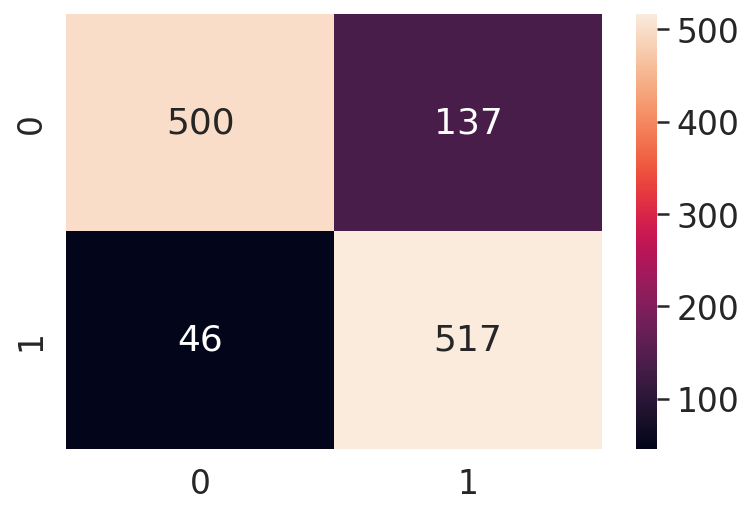

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score(results.actual, results.predicted)

#Plot the confusion matrix
sns.set(font_scale = 1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt = 'g')

In [14]:
accuracy = accuracy_score(results.actual, results.predicted)
accuracy

0.8475